# PoGaIN: Poisson-Gaussian Image Noise Modeling from Paired Samples

Authors: Nicolas Bähler, Majed El Helou, Étienne Objois, Kaan Okumuş, and Sabine
Süsstrunk, _Fellow_, _IEEE_.

This Jupyter notebook is showing how our variance-based baseline method (var) and our
cumulant based method (ours) can be used to estimate the parameters of the
Poisson-Gaussian noise model with paired samples.

Further, we show how the log-likelihood can be computed.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os

from implementations import var, ours, log_likelihood
from utils import (
    add_noise,
    load_image,
)

# Define the root directory
root = os.path.join(os.path.abspath(''), "..")


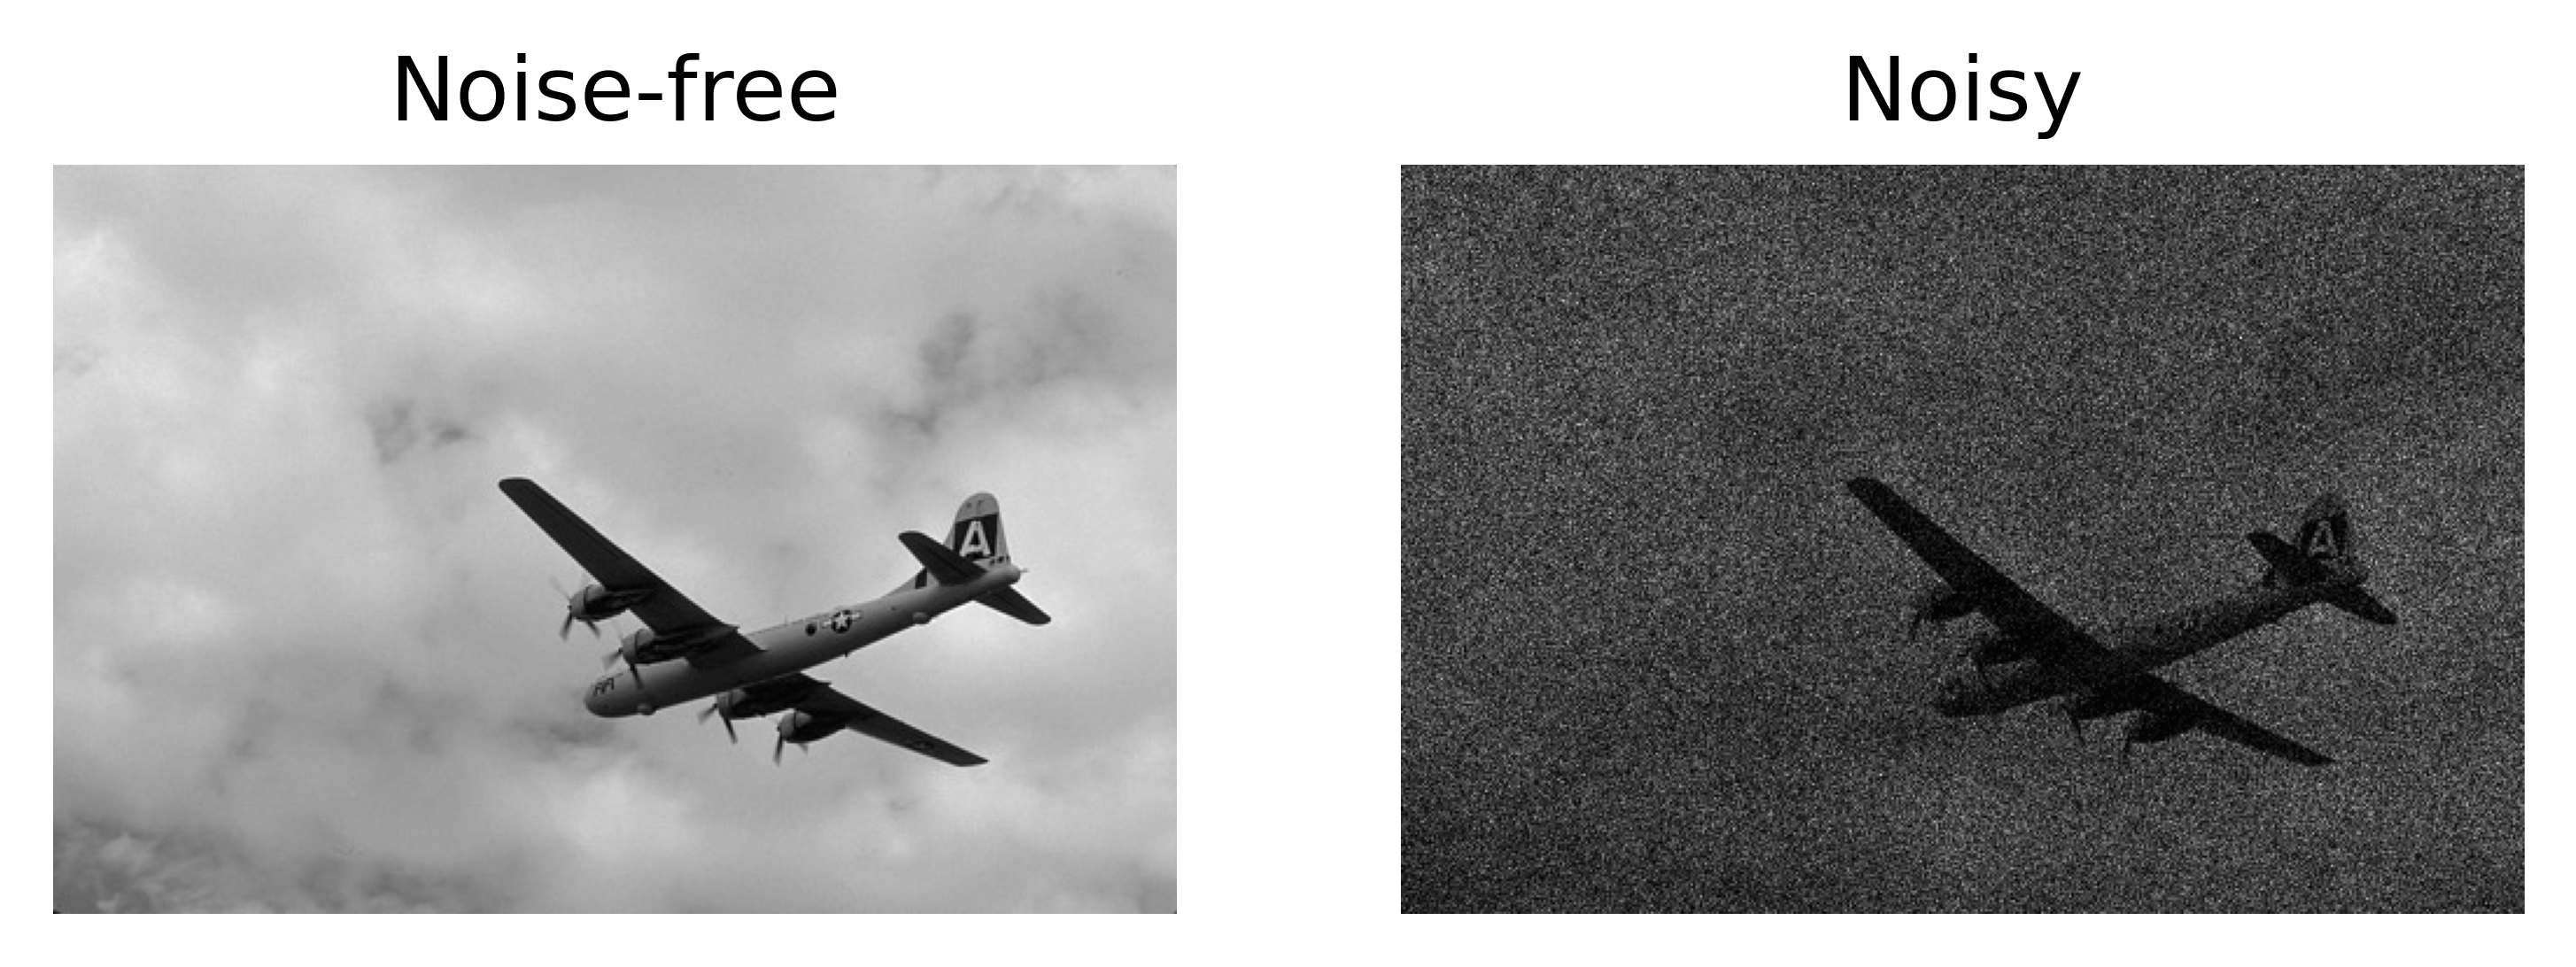

In [2]:
# Define parameters
a = 11
b = 0.01
seed = 42

# Load noise-free image
x, shape = load_image(os.path.join(root,"BSDS300/images/test/3096.jpg"))

# Synthesize and add noise to image
y = add_noise(x, a, b, seed)

# Show noise-free and the noisy image
_, axs = plt.subplots(1, 2, figsize=(6, 9), dpi=600)
axs[0].axis("off")
axs[0].imshow(x.reshape(shape), cmap="gray")
axs[0].set_title("Noise-free")

axs[1].axis("off")
axs[1].imshow(y.reshape(shape), cmap="gray")
axs[1].set_title("Noisy")

plt.show()


In [3]:
# Compute the estimates using the variance baseline and our method
a_v, b_v = var(x, y)
a_c, b_c = ours(x, y)

# Compute the log-likelihood for the ground truth parameters
ll = log_likelihood(x, y, a, b, k_max=100)

# Display the results
print("===============")
print("Ground truth:")
print(f"a={a}")
print(f"b={b}")
print("===============")
print("Log-likelihood:")
print(f"LL={round(ll, 3)}")
print("===============")
print("Var:")
print(f"a={round(a_v, 5)}")
print(f"b={round(b_v, 5)}")
print("===============")
print("Ours:")
print(f"a={round(a_c, 5)}")
print(f"b={round(b_c, 5)}")
print("===============")


Ground truth:
a=11
b=0.01
Log-likelihood:
LL=153825.966
Var:
a=11.08914
b=0.02098
Ours:
a=10.97338
b=0.00735
